In [1]:
# !pip install -q -U kaggle_environments

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from kaggle_environments import make, evaluate

warnings.filterwarnings('ignore')

# Напоминалка
#0 - камень
#1 - бумага
#2 - ножницы

Опишем поведение агента, всегда играющего "камень" - это значение 0

In [18]:
%%writefile agent_1_rock.py

# Всегда ходит камнем
def agent_1_rock(observation, configuration):
    return 0

Writing agent_1_rock.py


In [19]:
%%writefile agent_2_paper.py

# Всегда ходит бумагой
def agent_2_paper(observation, configuration):
    return 1

Writing agent_2_paper.py


In [20]:
%%writefile agent_3_scissors.py

# Всегда ходит ножницами
def agent_3_scissors(observation, configuration):
    return 2

Writing agent_3_scissors.py


Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [67]:
%%writefile agent_4_copy_opponent.py
import random
# Копируем последний ход оппонента
def agent_4_copy_opponent(observation, configuration):
    # Если у нас есть инфо о предыдущем ходе оппонента - возвращаем его же
    if observation.step > 0:
        return observation.lastOpponentAction
    # Первоначальный рандомный ход
    else:
        return random.randrange(0, configuration.signs)

Overwriting agent_4_copy_opponent.py


In [118]:
%%writefile agent_5_opposite_opponent.py
import random

# Возвращает биту для предыдущего хода оппонента 
def agent_5_opposite_opponent(observation, configuration):
    if observation.step > 0:
        oponent_action = observation.lastOpponentAction
        return 0 if oponent_action == configuration.signs - 1 else oponent_action + 1
    # Первоначальный рандомный ход
    else:
        return random.randrange(0, configuration.signs)

Overwriting agent_5_opposite_opponent.py


In [69]:
%%writefile agent_6_random.py
import random

# Возвращает рандомный ход
def agent_6_random(observation, configuration):
    return random.randrange(0, configuration.signs)

Overwriting agent_6_random.py


In [213]:
%%writefile agent_7_beat_mode.py
import random
from statistics import mode

oponent_actions = []

# Возвращает ход, который бьет наиболее частый ход противника
def agent_7_beat_mode(observation, configuration):
    global oponent_actions
    if observation.step > 0:
        # Добавить последнее действие противника в список
        oponent_actions.append(observation.lastOpponentAction)
        # Найти наиболее частый ход противника и походить его битой
        mode_action = mode(oponent_actions)
        return 0 if mode_action == configuration.signs - 1 else mode_action + 1
    # Первоначальный рандомный ход
    else:
        return random.randrange(0, configuration.signs)

Writing agent_7_beat_mode.py


In [137]:
%%writefile agent_8_one_by_one.py
import random

prev_action = None

# Возвращает камень - бумага - ножницы по кругу
def agent_8_one_by_one(observation, configuration):
    global prev_action
    # Найдем и сохраним следующий шаг
    if observation.step > 0:
        action = 0 if prev_action == configuration.signs - 1 else prev_action + 1
        prev_action = action
    # Первоначальный рандомный ход
    else:
        action = random.randrange(0, configuration.signs)
        prev_action = action
    return action

Overwriting agent_8_one_by_one.py


In [152]:
%%writefile agent_9_rock_by_paper.py

# Возвращает rock / paper / rock / paper / и тд. Без рандома
action = 0
def agent_9_rock_by_paper(observation, configuration):
    global action
    # Найдем и сохраним следующий шаг
    if observation.step > 0:
        action = 0 if action == 1 else 1
        return action
    # Первоначальный ход - камень
    else:
        return action

Overwriting agent_9_rock_by_paper.py


In [182]:
%%writefile agent_10_rock_or_paper.py
import random

# Рандомно возвращает камень или бумагу
def agent_10_rock_or_paper(observation, configuration):
    return random.randrange(0, 2)

Overwriting agent_10_rock_or_paper.py


In [186]:
%%writefile agent_11_beat_pattern_3.py
import random

oponent_actions = []

# Возвращает значение, чтобы побить шаблон оппонента. Анализ на основе 3 последних ходов.
def agent_11_beat_pattern_3(observation, configuration):
    global oponent_actions
    pattern_length = 3

    # Сохраняем предыдущий ход противника, если он известен
    if observation.step > 0:
        oponent_actions.append(observation.lastOpponentAction)

    # Если число ходов превысило длину паттерна, проверяем на совпадение
    if len(oponent_actions) >= pattern_length:
        last_pattern = tuple(oponent_actions[-pattern_length:])

        # Находим частоту шага, следующего за паттерном
        pattern_dict = {0: 0, 1: 0, 2: 0}
        
        # Проверяем все последовательности указанной длинны в предыдущих ходах оппонента
        for i in range(len(oponent_actions) - pattern_length):
            if tuple(oponent_actions[i:i + pattern_length]) == last_pattern:
                # Отмечаем +1 в словаре pattern_dict следующий за паттерном ход
                next_move = oponent_actions[i + pattern_length]
                pattern_dict[next_move] += 1

        # Выбираем из словаря pattern_dict наиболее вероятный следующий шаг
        most_likely_action = max(pattern_dict, key=pattern_dict.get)
        return 0 if most_likely_action == configuration.signs - 1 else most_likely_action + 1
    else:
        return random.randrange(0, configuration.signs)


Overwriting agent_11_beat_pattern_3.py


In [211]:
%%writefile agent_12_rock_by_scissors.py

# Возвращает rock / scissors / rock / scissors / и тд. Без рандома
action = 0
def agent_12_rock_by_scissors(observation, configuration):
    global action
    # Найдем и сохраним следующий шаг
    if observation.step > 0:
        action = 0 if action == 2 else 2
        return action
    # Первоначальный ход - камень
    else:
        return action

Writing agent_12_rock_by_scissors.py


In [212]:
%%writefile agent_13_rock_or_scissors.py
import random

# Рандомно возвращает камень (0) или ножницы (2)
def agent_13_rock_or_scissors(observation, configuration):
    return random.randrange(0, 3, 2)

Writing agent_13_rock_or_scissors.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр. Установим tieRewardThreshold = 1, чтобы оценка работала даже при небольшом перевесе агента (менее дефолтных 20)

In [258]:
# Турнир между агентами
agents = [
    'agent_1_rock', 'agent_2_paper', 'agent_3_scissors',
    'agent_4_copy_opponent', 'agent_5_opposite_opponent', 
    'agent_6_random', 'agent_7_beat_mode', 'agent_8_one_by_one', 
    'agent_9_rock_by_paper', 'agent_10_rock_or_paper',
    'agent_11_beat_pattern_3', 'agent_12_rock_by_scissors', 
    'agent_13_rock_or_scissors'
    ]

# Добавляем .py к каждому агенту
agents_files = [i + ".py" for i in agents]
agents_len = len(agents)

# Инициализируем матрицу результатов
scores = np.zeros((agents_len, agents_len))

# Играем каждый агент против каждого
for i in range(agents_len):
    for j in range(i + 1, agents_len):
        # Играем 3 раунда по 80 ходов в каждом
        result = evaluate("rps", [agents_files[i], agents_files[j]], configuration={"episodeSteps": 81, "tieRewardThreshold": 1}, num_episodes=3)
        # Вычисляем среднее арифметическое победных баллов и сохраняем в scores
        result_mean =np.mean(result, axis=0).round()
        scores[i][j] = result_mean[0]  # сохраняем результат для агента i
        scores[j][i] = result_mean[1]  # сохраняем результат для агента j

# Определяем победителя по числу побед
winner_by_count = []
for i in range(agents_len):
    wins = sum(1 for j in range(agents_len) if scores[i][j] > 0)  # считаем победы агента
    winner_by_count.append(wins)

# Определяем победителя по количеству набранных очков
winner_by_points = []
for i in range(agents_len):
    wins = sum(scores[i][j] for j in range(agents_len) if scores[i][j] > 0)  # считаем победные очки агента
    winner_by_points.append(wins)

# Определяем индексы победителей по числу побед
winners_by_count = [i for i, v in enumerate(winner_by_count) if v == max(winner_by_count)]
print("Победители турнира по числу побед:", '\n', *[agents_files[i] for i in winners_by_count])

# Определяем индексы победителей по числу набранных очков
winners_by_points = [i for i, v in enumerate(winner_by_points) if v == max(winner_by_points)]
print("Победители турнира по числу очков:", '\n', *[agents_files[i] for i in winners_by_count])

Победители турнира по числу побед: 
 agent_11_beat_pattern_3.py
Победители турнира по числу очков: 
 agent_11_beat_pattern_3.py


**Вывод** - агент agent_11_beat_pattern_3 является победителем как по числу побед, так и по числу победных очков

Text(0.5, 1.0, 'Тепловая карта победных очков агентов')

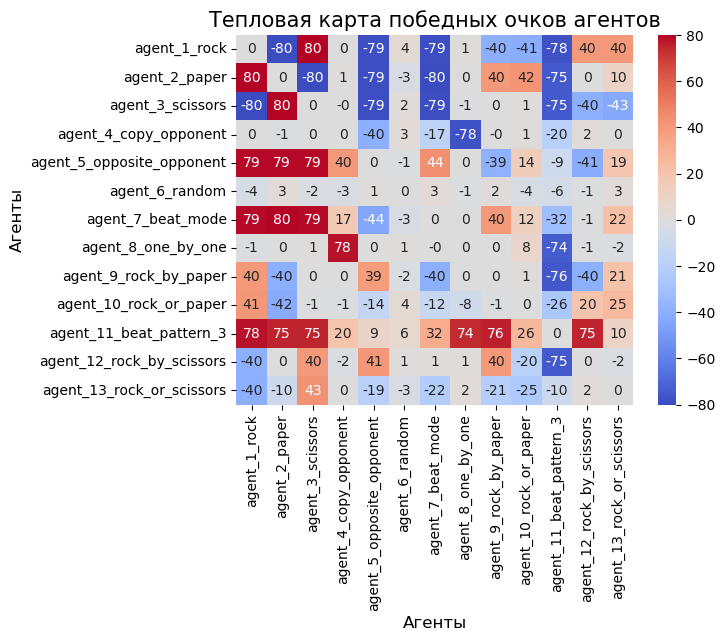

In [285]:
# Отобразим для наглядности тепловую карту набранных агентами победных очков и сумму очков агентов
scores_df = pd.DataFrame(scores, index=[agents], columns=[agents])
sns.heatmap(scores_df, annot=True, cmap='coolwarm');

plt.xlabel("Агенты", fontsize=12)
plt.ylabel("Агенты", fontsize=12)
plt.title("Тепловая карта победных очков агентов", fontsize=15)

In [282]:
# Отобразим сумму победных очков каждого агента
scores_df.sum(axis=1).sort_values()

agent_3_scissors            -314.0
agent_1_rock                -232.0
agent_4_copy_opponent       -150.0
agent_2_paper               -144.0
agent_13_rock_or_scissors   -103.0
agent_9_rock_by_paper        -97.0
agent_10_rock_or_paper       -15.0
agent_12_rock_by_scissors    -15.0
agent_6_random                -9.0
agent_8_one_by_one            10.0
agent_7_beat_mode            249.0
agent_5_opposite_opponent    264.0
agent_11_beat_pattern_3      556.0
dtype: float64

### Выводы на основании 80 игр (3 раунда по 80 игр):
1. Чаще всего выигрывал агент 11, способный проанализировать паттерн в поведении опонента и делать контр-ходы. Это логично, тк большинство других агентов построены именно на паттернах.
2. На втором месте 2 агента: выдающий контр-ход на основе предыдущего хода опонента и агент, выдающий контр-ход для текущего самого популярного хода опонента.
3. Агент 8, выдающий последовательно к-н-б, обыгрывает все время отстающего на 1 ход от него агента 4 (копирующего его предыдущий ход). Но, как агент с паттерном, ничего не может противопоставить агенту 11, который быстро вычисляет его паттерн.
4. Агент 11 (вычислятель паттернов) хуже всего справляется с рандомными агентами, что логично, ведь у них нет паттернов.
5. Агентов 1-3, выдающих всегда одно и то же, легко обыгрывают агенты 5, 7 и 11, делающие контр-ставки.

In [239]:
# Блок дебаггинга
# env = make("rps", configuration={"episodeSteps": 100})
# env.run(["agent_6_random.py", "agent_5_opposite_opponent.py"])
# env.render(mode="ipython", width=500, height=400)